# Decision Tree
At the most fundamental sense, a decision tree uses a series of if-then statements to classify data into different classes.
For example, a decision tree for classifying survival of passengers in the titanic dataset could look something like this.

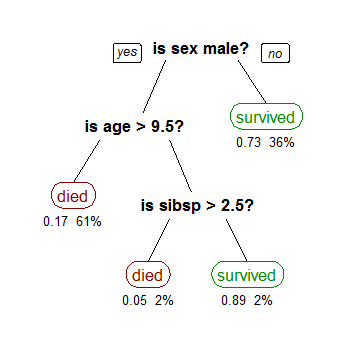

In [1]:
from IPython.display import Image
Image('https://upload.wikimedia.org/wikipedia/commons/f/f3/CART_tree_titanic_survivors.png')

A decision tree learns to split features recursively until a resonable decision can be made about the class to be predicted. Let's see an example to make a decision tree classifier using scikit-learn.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
plt.rcParams['figure.figsize'] = 8, 6
plt.style.use('ggplot')

In [4]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
columns = ['pclass', 'fare', 'age', 'adult_male', 'alone', 'survived']
titanic = titanic[columns]
titanic.dropna(inplace=True)

X = titanic.drop(['survived'], axis=1)
y = titanic['survived']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)

tree = DecisionTreeClassifier()
tree.fit(Xtrain, ytrain)

print('Train accuracy: {}'.format(tree.score(Xtrain, ytrain)))
print('Test accuracy: {}'.format(tree.score(Xtest, ytest)))

Train accuracy: 0.9877408056042032
Test accuracy: 0.7482517482517482


## Overfitting and Underfitting
When a model learns to classify the training data with very good accuracy, but performs poorly on test data, the problem is known as *overfitting*. It occurs if the model we're trying to learn is too complex and if there are not enough training examples.

In contrast, *underfitting* is when the model cannot perform well enough even in the training data. This usually occurs if the model we're trying to learn is too simple.

Decision trees are very prone to overfitting the data because they tend to make a very deep trees. So, to reduce overfitting, we can limit the depth of a decision tree by changing the value of `max_depth` parameter.

In [6]:
tree_new = DecisionTreeClassifier(max_depth=3)
tree_new.fit(Xtrain, ytrain)
print('Train accuracy: {}'.format(tree_new.score(Xtrain, ytrain)))
print('Test accuracy: {}'.format(tree_new.score(Xtest, ytest)))

Train accuracy: 0.8353765323992994
Test accuracy: 0.8321678321678322


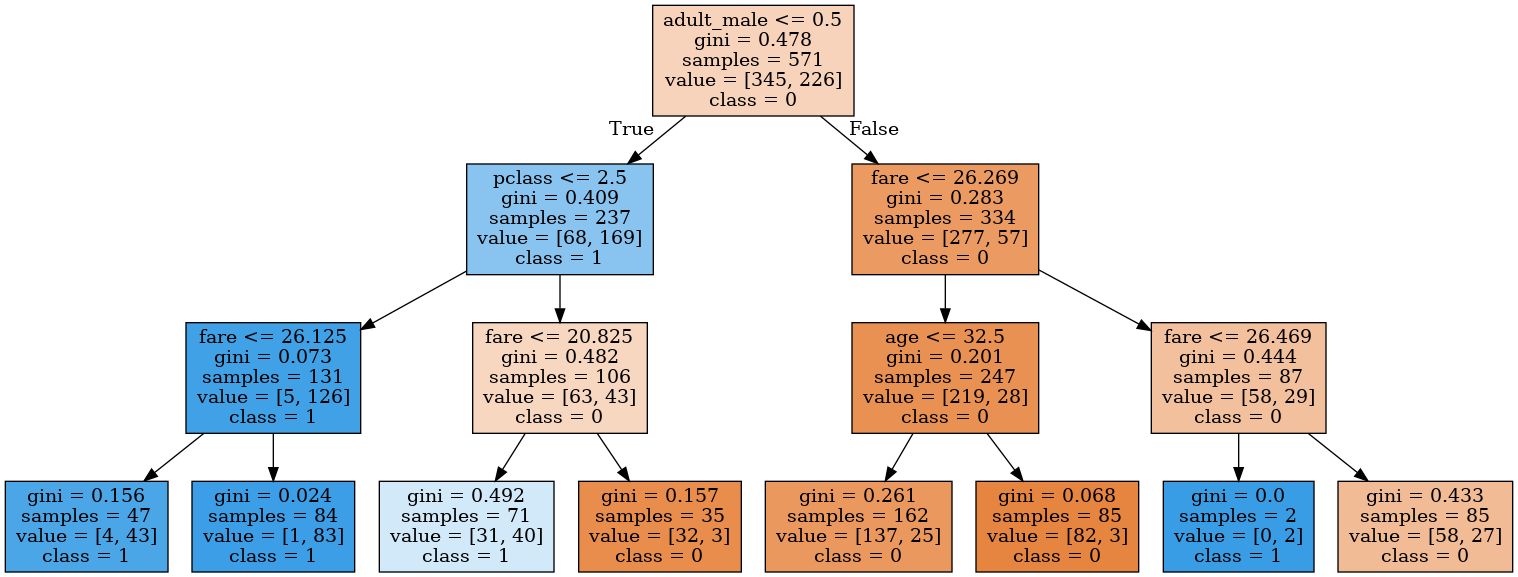

In [9]:
from sklearn.tree import export_graphviz
import graphviz

graph_data = export_graphviz(tree_new, filled=True, feature_names=X.columns, class_names=y.unique().astype('str'))
graph = graphviz.Source(graph_data)
Image(graph.pipe('png'))

# Random Forest
Random Forest makes many decision trees and decides the prediction based on majority voting of all predictions made by each decision tree. Such a model that combines multiple models to make predictions is known as *ensemble model*.

In [11]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=500)  # n_estimators is the number of decision trees
forest.fit(Xtrain, ytrain)

print('Train accuracy: {}'.format(forest.score(Xtrain, ytrain)))
print('Test accuracy: {}'.format(forest.score(Xtest, ytest)))

Train accuracy: 0.9877408056042032
Test accuracy: 0.7902097902097902


# Support Vector Machine (SVM)
As we learnt in the last class, a classification task is focused in finding a decision boundary that separates the data into different classes. With Support Vector Machines, we're still trying to do the same, but we'll see what's different about SVMs. Consider the following data points which can be divided into two classes with more than one decision boundaries.

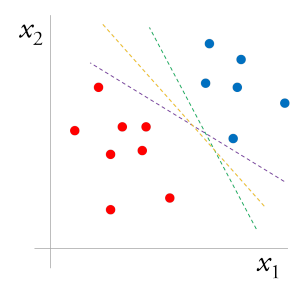

In [12]:
Image('http://efavdb.com/wp-content/uploads/2015/05/binaryclass_2d-300x284.png')

Clearly, all decision boundaries seem to separate the given data reasonable accuracy. But which one is the best? In *logistic regression*, we saw that we were looking for a decision boundary that maximizes the probability towards correct class and minimizes the probability towards incorrect class. With Support Vector Machines, we're trying to *maximize the margin* between the decision boundary and the nearest data points in each class. These nearest data points are also known as *support vectors* and SVM classifiers are a variant of what is known as *maximum margin classifiers*.

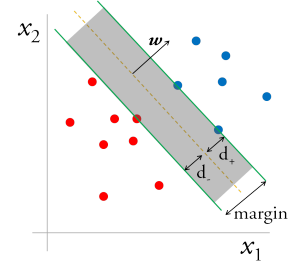

In [13]:
Image('http://efavdb.com/wp-content/uploads/2015/05/binaryclass_margin-300x266.png')

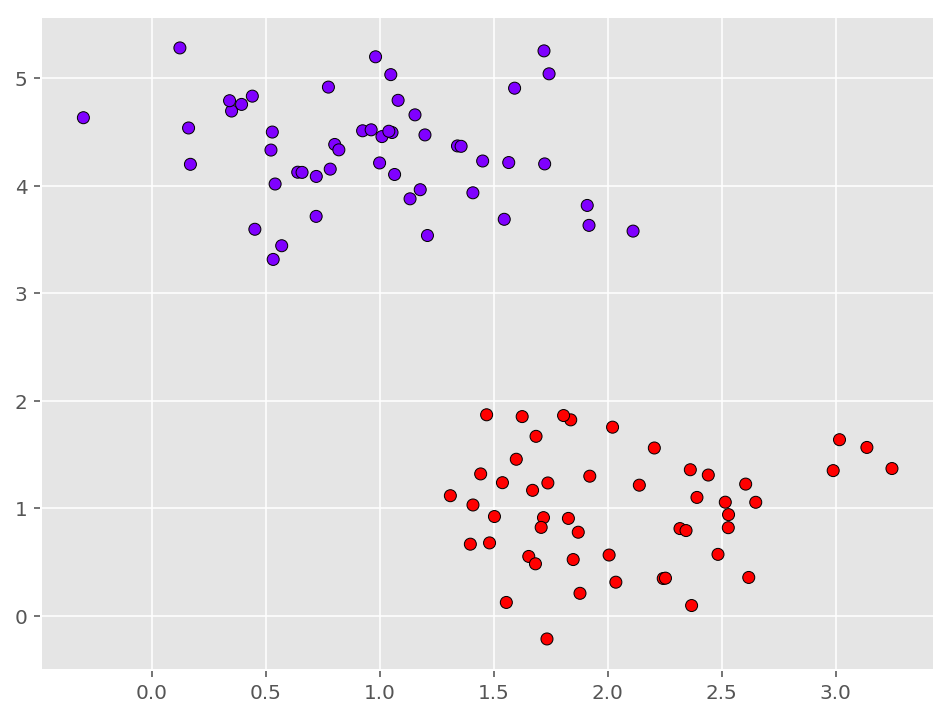

In [14]:
from sklearn.svm import SVC
from sklearn.datasets.samples_generator import make_blobs

import sys
sys.path.append('../resources')
from plot_utils import plot_decision_boundary, plot_svc_decision_function

X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.5)
plt.scatter(X[:,0], X[:,1], c=y, cmap='rainbow', edgecolors='k')

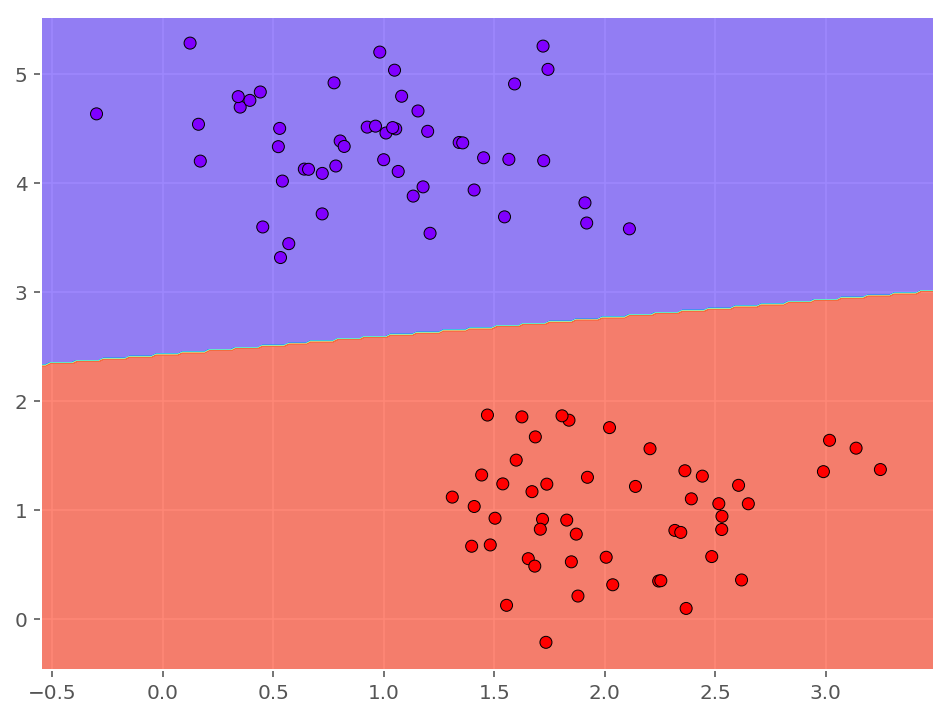

In [15]:
model = SVC(kernel='linear')  # We'll talk about kernel later.
model.fit(X, y)
plot_decision_boundary(X, y, model)

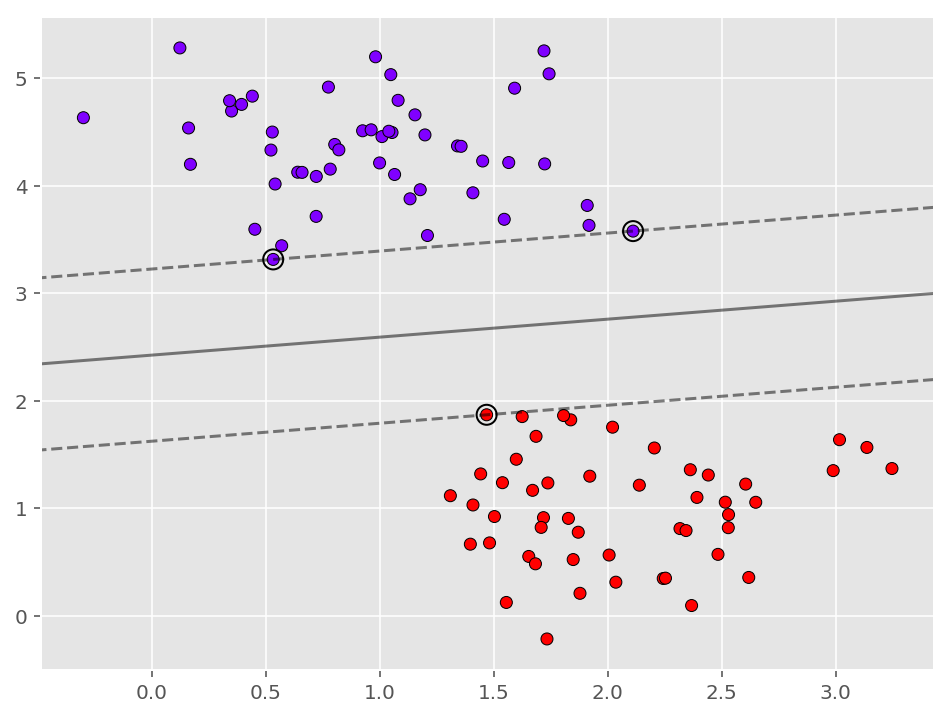

In [16]:
plot_svc_decision_function(X, y, model)

/home/ab/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


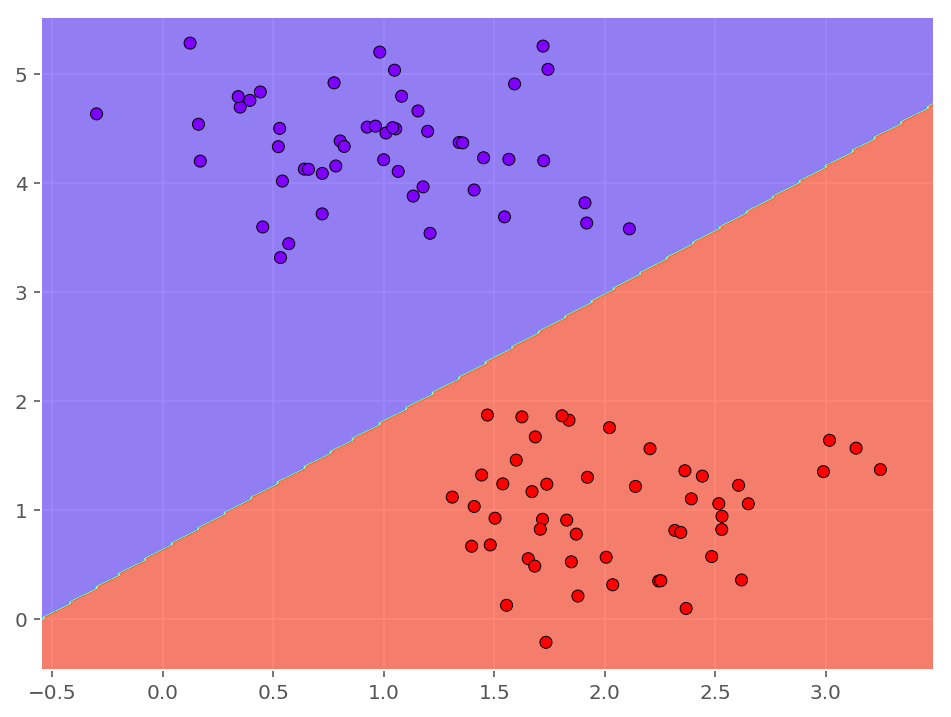

In [17]:
# Comparison with decision boundary of logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X, y)
plot_decision_boundary(X, y, model)

Comparing with the logistic regression model, we could conclude that, for our example dataset, SVM does a better job by maximizing the margins. However, it may not be always be desirable for SVM model to maximize the margin only from the nearest points since the nearest points could also be noise. For example, consider the following data points.

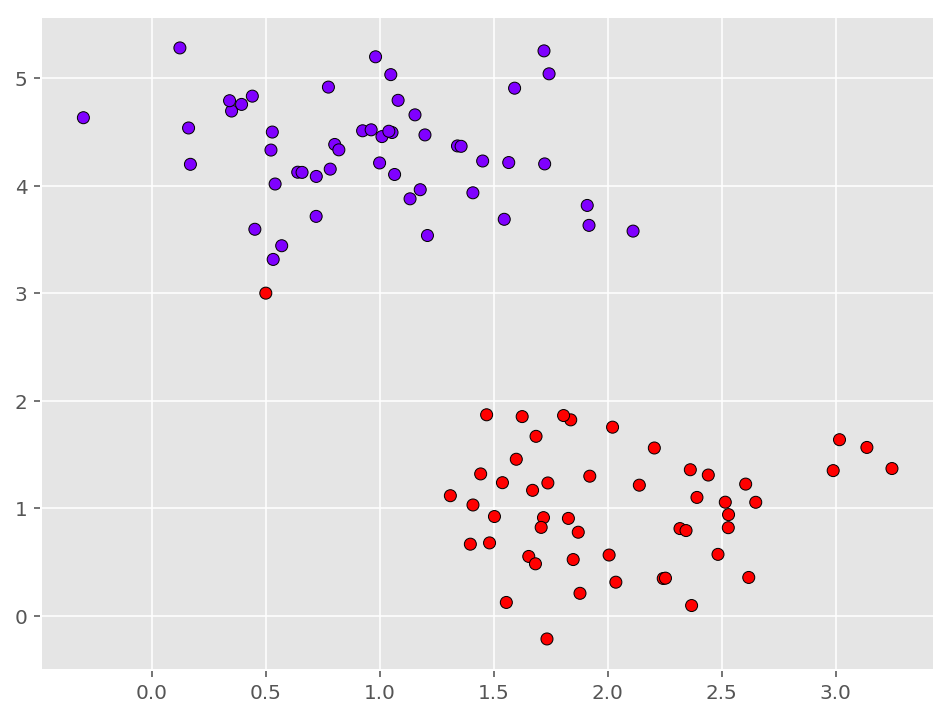

In [18]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.5)
X = np.append(X, [[0.5, 3]], axis=0)
y = np.append(y, 1)
plt.scatter(X[:,0], X[:,1], c=y, cmap='rainbow', edgecolors='k')

We can see a red point lurking around near blue points. Clearly, the red point is a noise. Let's see how SVM learns a decision boundary in such case.

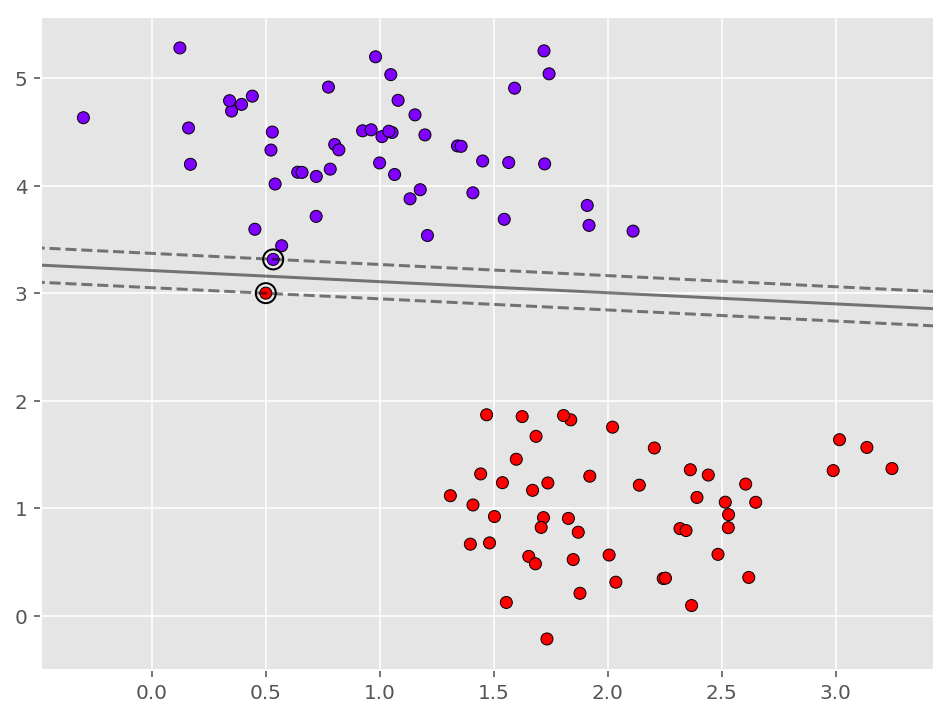

In [19]:
model = SVC(kernel='linear', C=20)  # Don't worry about C for now.
model.fit(X, y)
plot_svc_decision_function(X, y, model)

Clearly, the noise is significantly affecting our decision boundary in way that is likely to have adverse effects in the model performance. In such cases, we might rather want to ignore the noisy data point while optimizing for maximum margin. And this can be done by tweaking the `C` parameter, also known as the *cost* parameter. The `C` parameter determines how strict the decision boundary needs to be. But strict decision boundary means we might need to sacrifice the larger margin and settle for a smaller margin. Therefore, a large `C` value means we want to classify every point to the best accuracy possible even if it results in smaller margin. In contrast, a small `C` value means we want a larger margin even if it results in some points being classified inaccurately.

In above example, I have set the `C=20` which is pretty large (the default is `1`) which results in perfect accuracy, but the margins are pretty small. Let's see the results with smaller `C`.

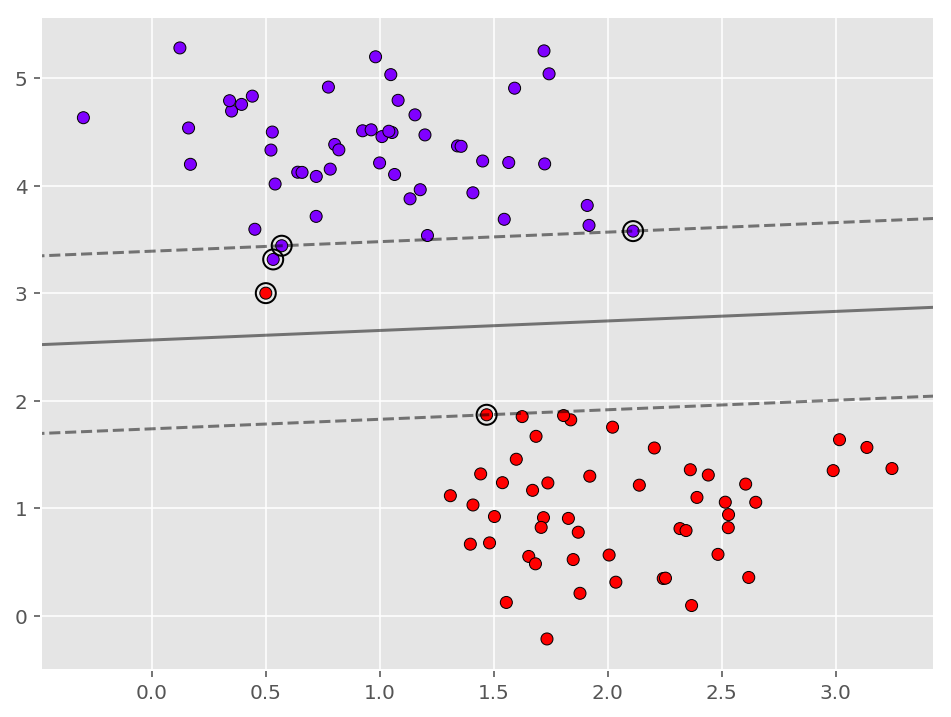

In [20]:
model = SVC(kernel='linear', C=1)
model.fit(X, y)
plot_svc_decision_function(X, y, model)

With smaller value of `C` parameter, this model learns a better decision boundary by optimizing for larger margin and sacrificing some classification accuracy.

In the machine learning literature, such parameters that we need to choose ourselves before training the model are also known as *hyperparameters*. In the earlier part of this notebook where we studied *decision tree*, the *maximum depth* of the tree was a hyperparameter, and in *random forest*, the *number of trees* was a hyperparameter.

Hyperparameters affect the model, and how it learns to classify the data, and thus the performance of the model. We often try and experiment with multiple models each with different sets of hyperparameters, and finally choose the one that performs the best. 

Next, we'll see how SVM classifiers can be used for multi-class classification, not just binary classification we saw above. And this can be done in exactly the same way as we did for binary classification.

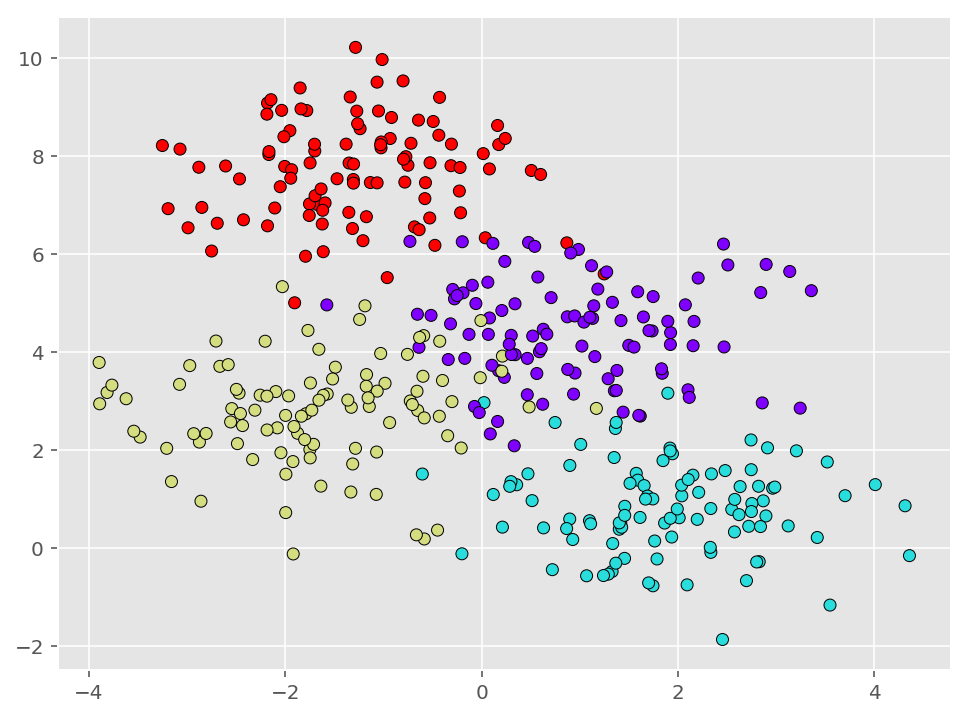

In [22]:
X, y = make_blobs(n_samples=400, centers=4, random_state=0, cluster_std=1)
plt.scatter(X[:,0], X[:,1], c=y, cmap='rainbow', edgecolors='k')

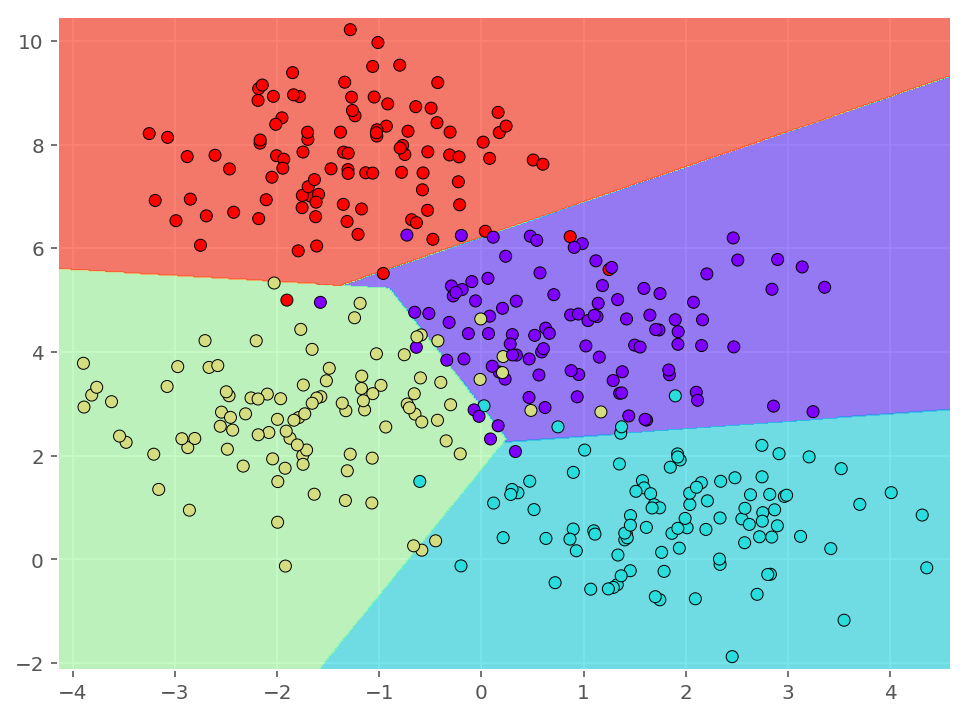

In [23]:
model = SVC(kernel='linear')
model.fit(X, y)
plot_decision_boundary(X, y, model)

The `kernel` in SVM allows us to learn *linearly inseparable* data by transforming the data into another dimension where a clear diving margin exists between classes of data.

/home/ab/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


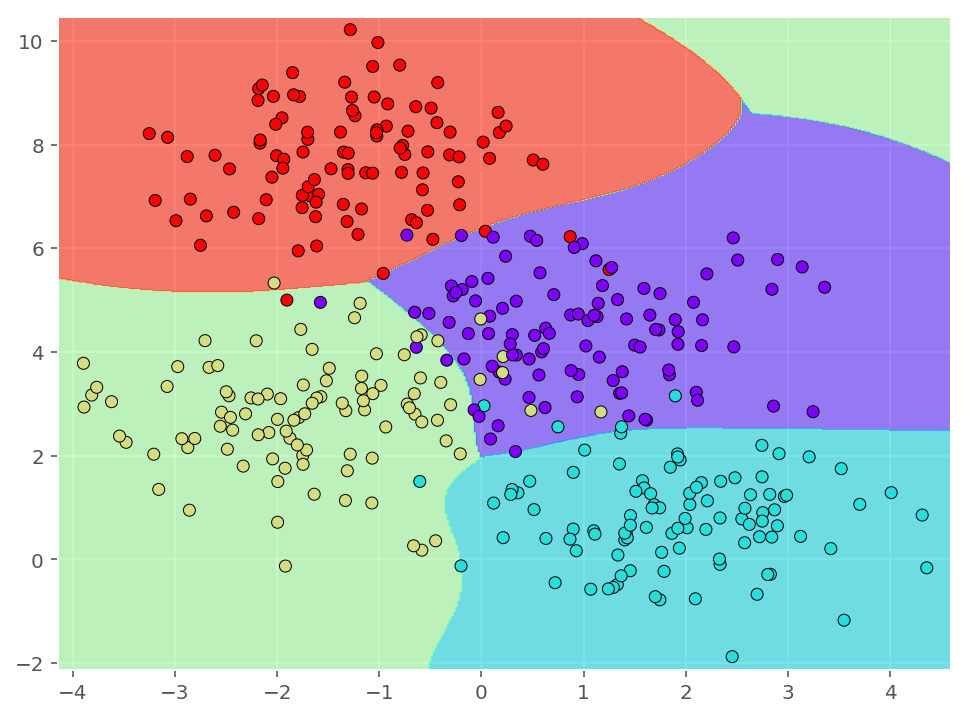

In [26]:
model = SVC(kernel='rbf')
model.fit(X, y)
plot_decision_boundary(X, y, model)

# Project 2: Iris Flower Species Classification
Train a SVM classifier to predict the species of iris flower on the iris dataset. You may load the dataset from seaborn library. Consider the following while doing so.

1. Use appropriate columns as features and labels. You need to map the *species* column to numerical values.
2. Use 70% of the data for training and 30% for testing.
3. Experiment by making multiple models with different kernel types and `C` parameter, and find the one with the best performance based on test accuracy.
4. On the best model choosen in Q3, find the class that is most misclassified (if there is one) by evaluating the confusion matrix.